<hr style="height: 1px;">
<i>This notebook was authored by the 8.S50x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 4: Introduction to Data Fitting</h1>


<a name='section_4_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L4.0 Overview</h2>


<table style="width:100%">
    <colgroup>
       <col span="1" style="width: 40%;">
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 45%;">
    </colgroup>
    <tr>
        <th style="text-align: left; font-size: 13pt;">Section</th>
        <th style="text-align: left; font-size: 13pt;">Exercises</th>
        <th style="text-align: left; font-size: 13pt;">Summary</th>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_4_1">L4.1 An Example: Hubble Constant</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_4_1">L4.1 Exercises</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;">
            <ul>
                <li>text</li>
                <li>text</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_4_2">L4.2 Derivation of Linear Regression</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_4_2">L4.2 Exercises</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;">
            <ul>
                <li>text</li>
                <li>text</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_4_3">L4.3 Linear Regression: Coding Example</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_4_3">L4.3 Exercises</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;">
            <ul>
                <li>text</li>
                <li>text</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_4_4">L4.4 Weighted Linear Regression</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_4_4">L4.4 Exercises</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;">
            <ul>
                <li>text</li>
                <li>text</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_4_5">L4.5 Minimization without the Math</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_4_5">L4.5 Exercises</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;">
            <ul>
                <li>text</li>
                <li>text</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_4_6">L4.6 Gradient Descent</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_4_6">L4.6 Exercises</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;">
            <ul>
                <li>text</li>
                <li>text</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_4_7">L4.7 Fitting the Full Range of Hubble Data</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_4_7">L4.7 Exercises</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;">
            <ul>
                <li>text</li>
                <li>text</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_4_8">L4.8 Fitting with lmfit</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_4_8">L4.8 Exercises</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;">
            <ul>
                <li>text</li>
                <li>text</li>
            </ul>
        </td>
    </tr>
</table>



<h3>Learning Objectives</h3>

In this lecture we will explore the following objectives:

- Linear Regression
- Weighted Linear Regression¶
- Minimizing without all of the math
- Gradient Descent: Actually understanding how we minimize numerically
- Optimized descent: The Newton Step

In this class, we are going to take apart fit minizers and put them back together. The goal here is to understand, how a computer does a fast minmization. However, to do this, we will first look at how we would do this with a pen and paper, then we will proceed to add more a more numerical techniques, until we can almost fit everything.

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook. 
Optionally, set the plot resolution and default figure size.


In [ ]:
#>>>RUN

import numpy as np

#set plot resolution
#%config InlineBackend.figure_format = 'retina'

#set default figure size
#plt.rcParams['figure.figsize'] = (9,6)


<a name='section_4_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L4.1 An Example: Hubble Constant</h2>  

| [Top](#section_4_0) | [Previous Section](#section_4_0) | [Exercises](#exercises_4_1) | [Next Section](#section_4_2) |


<h3>Slides</h3>

Run the code below to view the slides for this section.

In [ ]:
#>>>RUN

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L04/slides_L04_01.html', width=975, height=550)

<a name='exercises_4_1'></a>     

| [Top](#section_4_0) | [Restart Section](#section_4_1) | [Next Section](#section_4_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 4.1.1</span>

text


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return 0


### <span style="color: #90409C;">*>>> Follow-up (ungraded)*</span>

    
><span style="color: #90409C;">*TEXT*</span>


<a name='section_4_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L4.2 Derivation of Linear Regression</h2>  

| [Top](#section_4_0) | [Previous Section](#section_4_1) | [Exercises](#exercises_4_2) | [Next Section](#section_4_3) |


<h3>Supernova Data</h3>

For this class, we will use public data provided by the supernova galactic survey. This gives a list of supernova along with the distances, they were observed, their uncertainties, and their redshift. The way this is obtained is through galactic observations of supernovae, with the line shifts indicating their respective redshift.

To load the data, we need to know that the data is stored in terms of the distance modulus, $\mu$ defined [here](https://en.wikipedia.org/wiki/Distance_modulus). We can write this as 
\begin{equation}
d=10^{\frac{\mu}{5} + 1}
\end{equation}

Furthermore, the uncertainty $\sigma_{\mu}$ is given in terms of the distance modulus. We can write this as
\begin{eqnarray}
\sigma_{d} & = &  \frac{d d(\mu)}{d\mu} \sigma_{\mu} \\
           & = &  \frac{\log(10)}{5} 10^{\frac{\mu}{5} + 1}   \sigma_{\mu}
\end{eqnarray}
Lets go ahed and process that data. 

<ErrorbarContainer object of 3 artists>

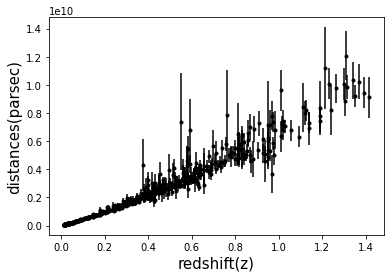

In [12]:
#>>>RUN

import math as math
import matplotlib.pyplot as plt
import numpy as np
import csv

#Today we are going to start with astro data from here : 
#http://supernova.lbl.gov/Union/
#Lets load the data
label='data/sn_z_mu_dmu_plow_union2.1.txt'

#Table stores name, redshift, distance modulus, distance modulus error
#Lets convert from distance modulus to distance
#See here https://en.wikipedia.org/wiki/Distance_modulus
def distanceconv(iMu):
    power=iMu/5+1
    return 10**power

def distanceconverr(iMu,iMuErr):
    power=iMu/5+1
    const=math.log(10)/5.
    return const*(10**power)*iMuErr

redshift=[]
distance=[]
distance_err=[]
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        redshift.append(float(row[1]))
        distance.append(distanceconv(float(row[2])))
        distance_err.append(distanceconverr(float(row[2]),float(row[3])))
        
plt.xlabel('redshift(z)', fontsize=15) #Label x
plt.ylabel('distances(parsec)', fontsize=15)#Label y
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')

[]


<ErrorbarContainer object of 3 artists>

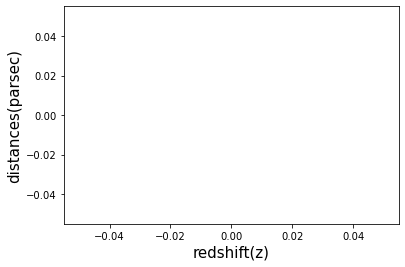

In [13]:
#>>>RUN

import math as math
import matplotlib.pyplot as plt
import numpy as np
import csv
import urllib.request

#Today we are going to start with astro data from here : 
#http://supernova.lbl.gov/Union/
#Lets load the data
label='https://raw.githubusercontent.com/mitx-8s50/data/main/L04/sn_z_mu_dmu_plow_union2.1.txt'

#Table stores name, redshift, distance modulus, distance modulus error
#Lets convert from distance modulus to distance
#See here https://en.wikipedia.org/wiki/Distance_modulus
def distanceconv(iMu):
    power=iMu/5+1
    return 10**power

def distanceconverr(iMu,iMuErr):
    power=iMu/5+1
    const=math.log(10)/5.
    return const*(10**power)*iMuErr

redshift=[]
distance=[]
distance_err=[]
with urllib.request.urlopen(label) as csvfile:
    lines = [l.decode('utf-8') for l in csvfile.readlines()]
    plots = csv.reader(csvfile, delimiter='\t')
    print(plots)
    for row in plots:
        print(row)
        redshift.append(float(row[1]))
        distance.append(distanceconv(float(row[2])))
        distance_err.append(distanceconverr(float(row[2]),float(row[3])))

        
print(redshift)
        
plt.xlabel('redshift(z)', fontsize=15) #Label x
plt.ylabel('distances(parsec)', fontsize=15)#Label y
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')

This plot has an interesting shape. Instead of looking at the whole plot, what we can do is zoom in a specific region and look at the performance there. For this case, we will take redshift ($z$) with a value $ < 0.1$

In [ ]:
#>>>RUN

#Now lets zoom in on the small redshift data
def load(iLabel,iZMax):
    redshift=np.array([])
    distance=np.array([])
    distance_err=np.array([])
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter='\t')
        for row in plots:
            if float(row[1]) > iZMax:
                continue
            redshift = np.append(redshift,float(row[1]))
            distance = np.append(distance,distanceconv(float(row[2])))
            distance_err = np.append(distance_err,distanceconverr(float(row[2]),float(row[3])))
    return redshift,distance,distance_err

redshift,distance,distance_err = load(label,0.1)
plt.xlabel('redshift(z)', fontsize=15) #Label x
plt.ylabel('distances(parsec)', fontsize=15)#Label y
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')

<h3>Linear Regression</h3>

The data above has a linear trend. What we want to do in this class is to come up with the line that best fits the data. To understand this, we are going to do a derivation. Just to warn you, this will likely be the most involved derivation in this whole class. 

Since you see a trend in the data, we would like to fit a function to this trend, where we define 
\begin{equation}
y = Ax + b
\end{equation}
The goal here is to extract $A$ and $b$. 

To extract this trend, we would like to create a best guess that we define as $\hat{y}$, which is a prediction based on $x$. We define this for our existing data that we would like to fit, defining 
\begin{equation}
\hat{y}_{i} = Ax_{i} + b
\end{equation}
where now we vary $A$ and $b$ so as to get a best estimate of $\hat{y}$. The minimization is then proceeded by minimizing the distance between the true value of $y$ in the data and the predicted value $\hat{y}$. We define this metric as $Q$, given by
\begin{eqnarray} 
Q & = & \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^2 \\
Q & = & \sum_{i=1}^{N}\left(y_{i}-Ax_{i}-b\right)^2 \\
\end{eqnarray}
Now to define a minimum, we just need to take a derivative with respect to $A$ and to $b$ and set each to zero, and \begin{eqnarray} 
\frac{dQ}{dA} & = & \sum_{i=1}^{N} -2 x_{i} \left(y_{i}-Ax_{i}-b\right) \\
              & = & \sum_{i=1}^{N} -2 \left(x_{i} y_{i}-Ax^{2}_{i}-b x_{i}\right) \\
              & = & 0
\end{eqnarray}          
and for $b$ we have, noting that the average value of $x$ is $\bar{x}=\frac{1}{N} \sum_{i=1}^{N} x_{i}$, gives us
\begin{eqnarray} 
\frac{dQ}{db} & = & \sum_{i=1}^{N} -2  \left(y_{i}-Ax_{i}-b\right) \\
              & = & 2Nb + 2A\sum_{i=1}^{N}x_{i}-2\sum_{i=1}^{N}y_{i} \\
              & = & 0 \\
{\rm Simplifying} \\
           b  & = & \frac{1}{N} \sum_{i=1}^{N}y_{i} - \frac{A}{N} \sum_{i=1}^{N}x_{i} \\
              & = & \bar{y} - A\bar{x}      
\end{eqnarray}          
Now, we can go back and solve for $A$ given the solution for $b$ in terms of $A$. This gives us
\begin{eqnarray} 
\frac{dQ}{dA} & = & \sum_{i=1}^{N} -2 \left(x_{i} y_{i}-Ax^{2}_{i}-\left(\bar{y} - A\bar{x}\right) x_{i}\right) \\
              & = & \sum_{i=1}^{N} -2 \left(x_{i} y_{i}-x_{i}\bar{y}-Ax^{2}_{i}+ A\bar{x}x_{i}\right) \\                           & = & -2 \sum_{i=1}^{N} x_{i}\left( y_{i}-\bar{y}\right)-2A\sum_{i=1}^{N} x_{i}\left(x_{i}-\bar{x}\right) \\
              & = & 0 \\
{\rm Solving} \\
A & = & \frac{\sum_{i=1}^{N} x_{i}\left( y_{i}-\bar{y}\right)}{\sum_{i=1}^{N} x_{i}\left(x_{i}-\bar{x}\right)} \\
  & = & \frac{\sum_{i=1}^{N} x_{i}\left( y_{i}-\bar{y}\right) +\sum_{i=1}^{N}\left(\bar{x}\bar{y}-y_{i}\bar{x}\right)}      
  {\sum_{i=1}^{N} x_{i}\left(x_{i}-\bar{x}\right) + \sum_{i=1}^{N}\left(\bar{x}^2-x_{i}\bar{x}\right)} \\
  & = & \frac{\sum_{i=1}^{N} \left( x_{i} y_{i}-x_{i}\bar{y}+\bar{x}\bar{y}-y_{i}\bar{x}\right)}      
  {\sum_{i=1}^{N} \left(x^2_{i}-x_{i}\bar{x} + \bar{x}^2-x_{i}\bar{x}\right)} \\
  & = & \frac{\frac{1}{N}\sum_{i=1}^{N} \left(x_{i} - \bar{x} \right) \left(y_{i}-\bar{y}\right)}      
             {\frac{1}{N}\sum_{i=1}^{N} \left(x_{i}-\bar{x}\right)^2}\\
\end{eqnarray} 
Ok that is a lot of math, but in the end we get variable that we can calculate it. Lets code this up! To do this I am going to break the above into a few functions. Let's define the covariance and variance as : 

\begin{eqnarray} 
\rm{VAR(x)}   & = & \frac{1}{N}\sum_{i=1}^{N} \left(x_{i}-\bar{x}\right)^2 \\
\rm{COV(x,y)} & = & \frac{1}{N}\sum_{i=1}^{N} \left(x_{i} - \bar{x} \right) \left(y_{i}-\bar{y}\right) \\
            A & = & \frac{\rm{COV(x,y)}}{\rm{VAR(x)}}
\end{eqnarray}
Note that this variance is just the variance we defined on the first lecture, but now in discrete form. Alright, now let's code this guy up!

<a name='exercises_4_2'></a>     

| [Top](#section_4_0) | [Restart Section](#section_4_2) | [Next Section](#section_4_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 4.2.1</span>

text


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return 0


### <span style="color: #90409C;">*>>> Follow-up (ungraded)*</span>

    
><span style="color: #90409C;">*TEXT*</span>


<a name='section_4_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L4.3 Linear Regression: Coding Example</h2>  

| [Top](#section_4_0) | [Previous Section](#section_4_2) | [Exercises](#exercises_4_3) | [Next Section](#section_4_4) |


<h3>Overview</h3>

TEXT


In [ ]:
#>>>RUN

#Lets run the regression again
def variance(isamples):
    mean=isamples.mean()
    n=len(isamples)
    tot=0
    for pVal in isamples:
        tot+=(pVal-mean)**2
    return tot/n

def covariance(ixs,iys):
    meanx=ixs.mean()
    meany=iys.mean()
    n=len(ixs)
    tot=0
    for i0 in range(len(ixs)):
        tot+=(ixs[i0]-meanx)*(iys[i0]-meany)
    return tot/n

def linear(ix,ia,ib):
    return ia*ix+ib

def regress(redshift,distance):
    #Lets regress
    var=variance(redshift)
    cov=covariance(redshift,distance)
    A=cov/var
    b=distance.mean()-A*redshift.mean()
    #Done!
    return A,b

def plotAll(redshift,distance,distance_err,A,b):
    #now lets plot it
    xvals = np.linspace(0,0.1,100)
    yvals = []
    for pX in xvals:
        yvals.append(linear(pX,A,b))

    #Plot the line
    plt.plot(xvals,yvals)
    plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
    plt.xlabel('redshift(z)', fontsize=15) #Label x
    plt.ylabel('distances(parsec)', fontsize=15)#Label y
    plt.show()
    #Print it out
    print("Hubbles Constant:",1e6*3e5/A,"intercept",b)#Note 1e6 is from pc to Mpc and 3e5 is c in km/s

A,b=regress(redshift,distance)
plotAll(redshift,distance,distance_err,A,b)

Above we have for the units of $A$ 

$$A = \frac{\rm distance(pc) }{\rm  Redshift~(z)}$$

Hubble's constant is defined as

$$h_{0} = \frac{\rm Redshift~(km/s)}{\rm distance(Mpc)}$$ 

So 

$$h_{0} = \frac{1}{A}\frac{\rm c~(km/s)}{10^{-6}}=\frac{1}{A}\frac{\rm 3\times10^{5}~(km/s)}{10^{-6}} $$

### Challenge Question

if you know the uncertainty on $\sigma_{A}$, what is the uncertainty on $h_{0}$?

In [ ]:
#Propagation of uncertainty
#f(A)=1/A=> df/dA=1/A^2
#sigma_{f} = df/dA \sigma_{A} = 1/A^2 \sigma_{A}

<a name='exercises_4_3'></a>     

| [Top](#section_4_0) | [Restart Section](#section_4_3) | [Next Section](#section_4_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 4.3.1</span>

text


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return 0


### <span style="color: #90409C;">*>>> Follow-up (ungraded)*</span>

    
><span style="color: #90409C;">*TEXT*</span>


<a name='section_4_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L4.4 Weighted Linear Regression</h2>  

| [Top](#section_4_0) | [Previous Section](#section_4_3) | [Exercises](#exercises_4_4) | [Next Section](#section_4_5) |


<h3>Overview</h3>

Now for each measurement, we also have an uncertainty. This uncertainty, we can define as $\sigma_{y}$. How actually the uncertainty is computed depends on the experiment. However, the uncertainty is **supposed** to correspond to the RMS of the measured value, or in other words, we perform the same measurement $N$ times, and we look at tha Variance of the measured value, and the variance over all measurements $y_{i}$ will be $V[y]=\sigma^2_{y}$.

Now for every measurement $y_{i}$ we have an uncertainty associated with it $\sigma_{y_{i}}$. We can thus define a metric to mimize that accounts for the fact that some measurements have large and small uncertainties. 

\begin{eqnarray} 
Q & = & \sum_{i=1}^{N}\frac{\left(y_{i}-\hat{y}_{i}\right)^2}{\sigma^{2}_{y_{i}}} \\
Q & = & \sum_{i=1}^{N}\frac{\left(y_{i}-Ax_{i}-b\right)^2}{\sigma^{2}_{y_{i}}} \\
\end{eqnarray}

From this setup, we can then follow the same procedure as before and minimize with respect to $A$ and $b$.  Yielding the equations below. 

\begin{eqnarray} 
\frac{dQ}{dA} & = & \sum_{i=1}^{N} -2 \frac{x_{i}}{\sigma_{i}^2} \left(y_{i}-Ax_{i}-b\right) \\
              & = & \sum_{i=1}^{N} -2 \frac{1}{\sigma_{i}^2} \left(x_{i} y_{i}-Ax^{2}_{i}-b x_{i}\right) \\
              & = & 0
\end{eqnarray}          

and 
\begin{eqnarray} 
\frac{dQ}{db} & = & \sum_{i=1}^{N} -2  \frac{1}{\sigma_{i}^2} \left(y_{i}-Ax_{i}-b\right) \\
              & = & 2Nb\sum_{i=1}^{N}\frac{1}{\sigma_{i}^2} + 2A\sum_{i=1}^{N} \frac{x_{i}}{\sigma_{i}^2} -2\sum_{i=1}^{N}\frac{y_{i}}{\sigma_{i}^2} \\
              & = & 0 \\
\end{eqnarray}          

From this, we can draw an analogy to the previous derivation, and write the answer given by reparametrizing in terms of the weighted mean defined as 
\begin{eqnarray} 
 \bar{y}_{w} & = & \frac{\sum_{i=1}^{N} \frac{y_{i}}{\sigma_{i}^2} }{\sum_{i=1}^{N} \frac{1}{\sigma_{i}^2} }
\end{eqnarray}    
, which also applies to $\bar{x}_{w}$. Given this we have the values for $A$ and $b$ with weights are. 
\begin{eqnarray} 
A  & = & \frac{\frac{1}{N}\sum_{i=1}^{N} \frac{1}{\sigma_{i}^2}\left(x_{i} - \bar{x}_{w} \right) \left(y_{i}-\bar{y}_{w}\right)}      
              {\frac{1}{N}\sum_{i=1}^{N} \frac{1}{\sigma_{i}^2}\left(x_{i}-\bar{x}_{w}\right)^2}\\
b  & = & \bar{y}_{w} - A\bar{x}_{w}      
\end{eqnarray}   

Let's again update our plot with this result.  

In [ ]:
#>>>RUN

weights=np.array([])
for pVal in distance_err:
    weights = np.append(weights,1./pVal**2)

#Now lets do it with weights
def variance_w(isamples,iweights):
    mean=np.average(isamples,weights=iweights)
    sumw=np.sum(iweights)
    tot=0
    for i0 in range(len(isamples)):
        tot+=iweights[i0]*(isamples[i0]-mean)**2
    return tot/sumw

def covariance_w(ixs,iys,iweights):
    meanx=np.average(ixs,weights=iweights)
    meany=np.average(iys,weights=iweights)
    sumw=np.sum(iweights)
    tot=0
    for i0 in range(len(ixs)):
        tot+=iweights[i0]*(ixs[i0]-meanx)*(iys[i0]-meany)
    return tot/sumw

def regress_w(redshift,weights,distance):
    varw=variance_w(redshift,weights)
    covw=covariance_w(redshift,distance,weights)
    Aw=covw/varw
    bw=np.average(distance,weights=weights)-Aw*np.average(redshift,weights=weights)
    return Aw,bw

Aw,bw=regress_w(redshift,weights,distance)
plotAll(redshift,distance,distance_err,Aw,bw)

*Brief aside on general form*
One last quick technical point is that people often write the linear regression in terms of a matrix over a vector $\vec{x}$ where each element $x_{i}$ in the vector is one of our measurements. The linear equation is then written as 
\begin{eqnarray} 
  \vec{\hat{y}} & = & A\vec{x}+b \\
  \vec{\hat{y}} & = & \beta\vec{x^{\prime}}\\
\end{eqnarray}
where $\vec{x^\prime} = (\vec{x},1)$ The resulting solution for best fit is written as
\begin{eqnarray} 
  \hat{\beta} & = & (\vec{x}^{T}\vec{x})^{-1}\vec{x}^{T}\vec{y}
\end{eqnarray} 
This is often how it is written in more advanced classes. In reality it is no different than what we showed above. We haven't included weights here, but they can be added. 

### Challenge Question

Let's imagine that our uncertainty is larger by a factor of its redshift value $\sigma_{i}^{new} = z \sigma_{i}^{old}$. How does the hubble constant change? Why this direction?

In [ ]:
#Answer
weights=np.array([])
#pC = 0
#for pVal in distance_err:
#    weights = np.append(weights,1./pVal/pVal/redshift[pC]/redshift[pC])
#    pC = pC + 1
weights=1/((redshift*distance_err)**2)

Aw,bw=regress_w(redshift,weights,distance)
plotAll(redshift,distance,distance_err,Aw,bw)

<a name='exercises_4_4'></a>     

| [Top](#section_4_0) | [Restart Section](#section_4_4) | [Next Section](#section_4_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 4.4.1</span>

text


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return 0


### <span style="color: #90409C;">*>>> Follow-up (ungraded)*</span>

    
><span style="color: #90409C;">*TEXT*</span>


<a name='section_4_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L4.5 Minimization without the Math</h2>  

| [Top](#section_4_0) | [Previous Section](#section_4_4) | [Exercises](#exercises_4_5) | [Next Section](#section_4_6) |


<h3>Overview</h3>

Now what if we just want to minimize without all of the math. Well first, lets just generalize the form of what we would like to minimize. We can write the form of this minimization in terms of an arbitrary function $f(x|\theta_{i})$ where $\theta_{i}$ denotes any parameter that we would want to minimize. For the linear regression $\vec{\theta}=(A,b)$. The parameter we would want to minimize is
\begin{equation}
Q=\sum_{i=1}^N \left(y-f(x\mid\theta_j)\right)^2,
\end{equation}
which in it's most general form minimization gives us
\begin{equation}
 \frac{\partial Q}{\partial\theta_{i}} = \frac{\partial}{\partial \theta_{i}}\sum_{i=1}^{N}\left(y_{i}-f(x|\theta_{i}\right)^2=\sum_{i=1}^{N} 2 \left(y_{i}-f(x|\theta_{i}\right)\frac{\partial f(x|\theta_{i})}{\partial \theta_{i}}
\end{equation}

Which is effectively a tool kit that we can compute numrically. Let's start by using the scipy stats toolkit to perform the linear regression. Note, this code is done just by going to the scipy stats page and following their examples.

In [ ]:
#>>>RUN

from scipy import stats

#Now lets do the same thing with standard python tools
slope, intercept, r_value, p_value, std_err = stats.linregress(redshift,distance)
print("UnWeighted Fit:","Hubbles Constant:",1e6*3e5/slope,"intercept",intercept)

#now with weights
from sklearn.linear_model import LinearRegression
model = LinearRegression()
redshifthack=np.reshape(redshift,(len(redshift),1))#line to get the fit code to work
model.fit(redshifthack,distance,weights)
slope=model.coef_
const=model.intercept_
print("Weighted Fit:","Hubbles Constant:",1e6*3e5/slope,"intercept",const)

What exactly is this doing? Its finding a mimum to get the slope. Lets understand the toolkit to find a minimum. 

In [ ]:
#>>>RUN

#Now lets do this with a general tool that optimizes
from scipy import optimize as opt
#First lets see what it does
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1
sol=opt.minimize_scalar(f, method='Brent')
x = np.linspace(-8, 5, 100)

plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('f(x)', fontsize=15)#Label y
plt.plot(x, f(x));
plt.axvline(sol.x, c='red')

This algorithm steps along the function and finds a minimum. The way it does this is through some minimum finding algorithm. Its not essential, just yet, how it finds the minimum, but suffice it to say that its basically just evaluating the function many times and finding a minimum.  Before we discuss how the minimizer works, lets go ahead and see how we can use this same minimizer to perform a fit.  **Note the uncertainties will be discussed later**

In [ ]:
#>>>RUN

#great it finds the minimum of a function lets take a fancier tool based on this
from scipy.optimize import curve_fit

def f(x,a,b):
    return a*x+b

popt, pcov = curve_fit(f, redshift,distance)
perr = np.sqrt(np.diag(pcov))
print("Unweighted Hubbles Constant:",1e6*3e5/popt[0],"+/-",(1e6*3e5/popt[0]/popt[0])*perr[0],"intercept",popt[1],"+/-",perr[1])

#Now lets do it with weights
popt, pcov = curve_fit(f, redshift,distance,sigma=distance_err)
perr = np.sqrt(np.diag(pcov))
print("Weighted Hubbles Constant:",1e6*3e5/popt[0],"+/-",(1e6*3e5/popt[0]/popt[0])*perr[0],"intercept",popt[1],"+/-",perr[1])

### Challenge Question

Compute the minimum of a 2D mexican hat potential function given by 
\begin{equation}
f(x) = (x-1)^{2}(x+1)^2-50x^2
\end{equation}
What is wrong with this minimizer? 

In [ ]:
#answer
def f(x):
    return ((x-1)**2)*((x+1)**2)-50*x**2
sol=opt.minimize_scalar(f, method='Brent')
x = np.linspace(-8, 8, 100)

plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('f(x)', fontsize=15)#Label y
plt.plot(x, f(x));
plt.axvline(sol.x, c='red')
hide_toggle()

<a name='exercises_4_5'></a>     

| [Top](#section_4_0) | [Restart Section](#section_4_5) | [Next Section](#section_4_6) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 4.5.1</span>

text


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return 0


### <span style="color: #90409C;">*>>> Follow-up (ungraded)*</span>

    
><span style="color: #90409C;">*TEXT*</span>


<a name='section_4_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L4.6 Gradient Descent</h2>  

| [Top](#section_4_0) | [Previous Section](#section_4_5) | [Exercises](#exercises_4_6) | [Next Section](#section_4_7) |


<h3>Slides</h3>

Run the code below to view the slides for this section.

In [ ]:
#>>>RUN

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L04/slides_L04_06.html', width=975, height=550)

<h3>Overview</h3>

![Screen%20Shot%202021-12-02%20at%2011.31.53%20AM.png](attachment:Screen%20Shot%202021-12-02%20at%2011.31.53%20AM.png)

To minimize something, what we need to is follow along a function until we reach the minimium. Another way to think about this is if we have a potential function $U(x)$, how do we get an object to reach the bottom of the potential? 

Well, in this case, all we need to do is rely on our understanding of physics and motion in a potential.  To understand gradient descent, we need to use some physics. Recall that for a potential given by $U$ the force on that potential is 

$F=-\nabla U$ 

and this force will give us some momentum as if we are moving down a hill. Likewise from this we can write the acceleration over time is given by

$\vec{a}=-\frac{1}{m}\nabla U$

and further we can write, integrating,

$\vec{v}=\int \vec{a} dt =-\int \frac{1}{m}\nabla U dt$,

and for position we can write for displacement 

$\vec{s}=\int \vec{v} dt =\int \int \vec{a} dt dt =-\int \int \frac{1}{m}\nabla U dt dt$


Now to find a minimum what we can do is envision a ball rolling down our function towards the minimum. We can compute its motion and acceleration through the usual kinematics equation. We can do this with a stepwise iterator
\begin{eqnarray}
\vec{v} = \vec{v_0} - \delta t \nabla f \\
\vec{x} = \vec{x_0} + \delta t \vec{v} - (\delta t)^2\nabla f 
\end{eqnarray}
Let's code this up by hand first to understand gradient descent, keep in mind that this is not a physics problem, it's just a function in the end. 


In [ ]:
#>>>RUN

#Lets find the minimum of x^2
def f(x):
    return x**2
def grad(x):
    return 2*x

<h3>Simple gradient descent</h3>
#now we are going to move from x in timestesps alpha
def gd(x, grad, alpha, max_iter=10):
    xs = np.zeros(1 + max_iter)
    xs[0] = x #start at x
    for i in range(max_iter):
        x = x - alpha * grad(x) #alpha is going to be our timestep
        xs[i+1] = x
    return xs

<h3>Physics based gradient descent</h3>
#Now will update both momentum and velocity in timesteps alpha but with a dilution factor of beta
def gd_momentum_true(x, grad, alpha,max_iter=10):
    xs = np.zeros(1 + max_iter)
    xs[0] = x
    v = 0
    for i in range(max_iter):
        v = v - alpha*grad(x)
        x = x + alpha * v  - 0.5 * alpha * alpha*grad(x)
        xs[i+1] = x
    return xs

def plotGDAlgo(iGDAlgo,alpha=0.1,beta=-1,x0=1):
    if beta != -1:
        xs = iGDAlgo(x0, grad, alpha,beta)
    else:
        xs = iGDAlgo(x0, grad, alpha)
    xp = np.linspace(-1.2, 1.2, 100)

    #Now just plotting code
    plt.xlabel('x', fontsize=15) #Label x
    plt.ylabel('f(x)', fontsize=15)#Label y
    plt.plot(xp, f(xp)) #function
    plt.plot(xs, f(xs), 'o-', c='red') #varied function
    for i, (x, y) in enumerate(zip(xs, f(xs)), 1):
        plt.text(x, y+0.2, i,bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
    plt.show()    

plotGDAlgo(gd)
plotGDAlgo(gd,0.95) #large timestep alpha
plotGDAlgo(gd_momentum_true,0.95) #Large timestep

So why isn't it finding the minimium? 
Energy is conserved! We need to add a friction term, which we do by defining a variable we call damp. 

We can define the damp variable as some number damp$<1$. In this case, we will define it as 
\begin{equation}
 \rm{damp} = \frac{1}{1+\beta^{\rm{iter}+1}}
\end{equation}
for $\beta$ some parameter. Damp is, thus, a value less than 1 that rapidly damps down towards motion at the minimum. Its effectively a friction term. Lets add it. 

In [ ]:
#>>>RUN

#now we are going to move from x in timestesps alpha
def gd_momentum_true(x, grad, alpha,beta=1.0, max_iter=10):
    xs = np.zeros(1 + max_iter)
    xs[0] = x
    v = 0
    for i in range(max_iter):
        v = v - alpha*grad(x)
        damp = 1/(1+beta**(i+1)) #now damped
        x = x + damp*(alpha * v  - 0.5 * alpha * alpha*grad(x))
        xs[i+1] = x
    return xs

#Now will update both momentum and velocity in timesteps alpha but with a dilution factor of beta
def gd_momentum(x, grad, alpha, beta=0.9, max_iter=10):
    xs = np.zeros(1 + max_iter)
    xs[0] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)#beta is the samping term here
        vc = v/(1+beta**(i+1))#and damp
        x = x - alpha * vc
        xs[i+1] = x
    return xs

plotGDAlgo(gd)
plotGDAlgo(gd,0.95) #large timestep alpha
plotGDAlgo(gd_momentum_true,0.95) #Large timestep
plotGDAlgo(gd_momentum,0.95) #Large timestep
plotGDAlgo(gd_momentum,0.95,beta=0.7) #Large timestep
plotGDAlgo(gd_momentum,0.95,beta=0.9) #Large timestep

So all of these guys approach the minimum and you can be quite flexible. We can in fact use any minimization function we want in `scipy.optimize`. It will do the iterative stepping for us. Let's write our own minimizer and throw it in. We can do it for our previous quartic equation. 

In [ ]:
#Now lets do this with a general tool that optimizes
import scipy.linalg as la
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

def fprime(x):
    return 4*x**3 + 9*(x-2)**2 - 30*(x)

#Where is our minimizer
def custmin(fun, x0, args=(), maxfev=None, alpha=0.0002,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the function above."""
    bestx = x0
    bestf = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        # the next 2 lines are gradient descent
        step = alpha * fprime(bestx)
        bestx = bestx - step
        
        bestf = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=bestf, x=bestx, nit=niter,nfev=funcalls, success=(niter > 1))

def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

x0=-7
x0 = np.array([x0])
ps = [x0]
sol=opt.minimize(f, x0, method=custmin, callback=reporter)
x = np.linspace(-8, 5, 100)
plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('f(x)', fontsize=15)#Label y
plt.plot(x, f(x));
plt.axvline(sol.x, c='red')
plt.show()

#Now lets trick it
x0=5
x0 = np.array([x0])
ps = [x0]
sol=opt.minimize(f, x0, method=custmin, callback=reporter)
x = np.linspace(-8, 5, 100)
plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('f(x)', fontsize=15)#Label y
plt.plot(x, f(x));
plt.axvline(sol.x, c='red')
plt.show()

<a name='exercises_4_6'></a>     

| [Top](#section_4_0) | [Restart Section](#section_4_6) | [Next Section](#section_4_7) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 4.6.1</span>

text


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return 0


### <span style="color: #90409C;">*>>> Follow-up (ungraded)*</span>

    
><span style="color: #90409C;">*TEXT*</span>


<a name='section_4_7'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L4.7 Fitting the Full Range of Hubble Data</h2>  

| [Top](#section_4_0) | [Previous Section](#section_4_6) | [Exercises](#exercises_4_7) | [Next Section](#section_4_8) |


<h3>Overview</h3>

Now, what if we want to minimize a function a fit function in two dimensions.  To do that, we are going to go back to our supernova data, and fit the line with a modified slope expansion given by:

$$ f(x) = \frac{x}{h_{0}}\left(1+\frac{1-q}{2}x\right) $$

Additionally, we have removed $b$, since this form is a closer approximation of the true form of the expansion of the universe, and in that instance $f(0)=0$

Recall that we needed to minimize: 

\begin{equation}
 \frac{\partial Q}{\partial\theta_{i}} = \frac{\partial}{\partial \theta_{i}}\sum_{i=1}^{N}\left(y_{i}-f(x|\theta_{i}\right)^2=\sum_{i=1}^{N} 2 \left(y_{i}-f(x|\theta_{i}\right)\frac{\partial f(x|\theta_{i})}{\partial \theta_{i}}
\end{equation}

, which means that we need compute $\frac{\partial f}{\partial h_{0}}$ and $\frac{\partial f}{\partial q}$. We do it belowin `fprime` and output a vector with two outputs for $h_{0}$ and $q$ respectively. 


In [ ]:
#Ok lets do a custom minimization of our fit function with gradient descent
#Note that since we are fitting two parameters we need to do this in 2D
redshift,distance,distance_err = load(label,10)
weights=np.array([])
for pVal in distance_err:
    weights = np.append(weights,1./pVal/pVal)

def f(x,h0,q):
    val=x*(1e6*3e5/h0)*(1 + ((1-q)*0.5)*x)
    return val

def fprime(x,h0,q):
    der=np.zeros(2)
    der[0]=-1*x*(1e6*3e5/h0/h0)*(1 + ((1-q)*0.5)*x)
    der[1]=x*(1e6*3e5/h0)*(-0.5*x)
    return der

def algof(inputs):
    d=0
    for i0 in range(len(redshift)):
        yhat=f(redshift[i0],inputs[0],inputs[1])
        pD=(distance[i0]-yhat)**2
        #pD=pD/dmean
        d+=pD*weights[i0]
    return d

def algofprime(inputs):
    d=np.zeros(2)
    for i0 in range(len(redshift)):
        yhat=f(redshift[i0],inputs[0],inputs[1])
        pD=2*(distance[i0]-yhat)
        yhatprime=fprime(redshift[i0],inputs[0],inputs[1])
        #print(yhatprime,pD,d)
        #pD=pD/dmean
        d=d+(yhatprime*pD)*weights[i0]
    return d

def custmin(fun, x0, args=(), maxfev=None, alpha=0.0001,maxiter=10000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the function above."""
    bestx = x0
    bestf = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        if niter % 1000 == 0: 
            print(niter,bestx)
        # the next 2 lines are gradient descent
        step = alpha * algofprime(bestx)
        #print(bestx,step)
        bestx = bestx + step

        bestf = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=bestf, x=bestx, nit=niter,nfev=funcalls, success=(niter > 1))

def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

#tmp=algofprime([70,0.03])
x0 = np.array([40,0])
ps = [x0]
sol0=opt.minimize(algof, x0, method=custmin, callback=reporter)
print(sol0)

sol1=opt.minimize(algof, x0)#, method=custmin, callback=reporter)
print(sol1)
    

<h3>Slides</h3>

Run the code below to view the slides for this section.

In [ ]:
#>>>RUN

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L04/slides_L04_07.html', width=975, height=550)

<h3>Optimized minimizers Newton Step</h3>

Now typically more advanced optimization methods are used beyond gradient descent. Hence the fact that if we don't use our custom minimizer we get the same answer but in a fraction of time. These minimizers are based on something called the Newton step, which you can think of as a dance move that Newton perfomed. It follows like this. Recall from a Taylor expansion we have
\begin{equation}
f(x+h)=f(x)+h\frac{df}{dx}(x)+\frac{h^2}{2}\frac{d^2f}{dx^2} \\
\end{equation}
Now we know that at the function's minimum the derivative is zero and so we have
\begin{equation}
\frac{f(x+h)-f(x)}{h}=0=\frac{df}{dx}(x)+\frac{h}{2}\frac{d^2f}{dx^2} \\
\end{equation}
and so for $\frac{h}{2}=\Delta x$ we get the Newton step: 
\begin{equation}
0=\frac{df}{dx}(x)+\Delta x \frac{d^2f}{dx^2} \\
\Delta x=-\frac{\frac{df}{dx}}{\frac{d^2f}{dx^2}}(x)\\
\Delta x=-\frac{f^{\prime}(x)}{f^{\prime\prime}(x)}\\
\end{equation}
This defines a stepwise iteration that we can do step by step. Namely, we have $x\rightarrow x+\Delta x$. You might recall this same procedure from Newtons' method of finding roots $x_{k+1}=x_{k}-\frac{f(x)}{f^{\prime}(x)}$.  We can generalize this into N dimensions. This gives us: 
\begin{equation}
f(\vec{x}+\vec{h})=f(\vec{x})+\vec{h}^{T}\nabla f(x)+ \frac{1}{2}\vec{h}^{T}\frac{\partial^2 f}{dx_{i}dx_{j}}\vec{h} \\
\vec{h}=-\left(\frac{\partial^2 f}{dx_{i}dx_{j}} \right)^{-1}\nabla f(\vec{x})
\end{equation}
where we have the Hessian given by $\frac{\partial^2 f}{dx_{i}dx_{j}}$. This gives us a way to step through the optimization very efficiently. There are many variations on a theme, Adam, RMSProp, ... All of these are minimization algorithms that get us along the same way. 

Finally, we should note that above, we analytically computed the derivative. However, its often the case the function is not analytic. Then we have to compute this on the fly. Let's take our example above and do a numerical derivative again. 

We can define the numerical derivative as 
\begin{equation}
\frac{\partial}{\partial \theta_{i}} \vec{f} = \frac{f\left(\vec{x} + \Delta \hat{\theta}_{i}\right)-f\left(\vec{x} - \Delta \hat{\theta}_{i}\right)}{2\Delta\theta}
\end{equation}

In [ ]:
#Ok lets do a custom minimization of our fit function with gradient descent
#Note that since we are fitting two parameters we need to do this in 2D
def f(x,h0,q):
    val=x*(1e6*3e5/h0)*(1 + ((1-q)*0.5)*x)
    return val

def algof(inputs):
    d=0
    for i0 in range(len(redshift)):
        yhat=f(redshift[i0],inputs[0],inputs[1])
        pD=(distance[i0]-yhat)**2
        #pD=pD/dmean
        d+=pD*weights[i0]
    return d

def algofprime(inputs):
    delta1=np.array([inputs[0]*0.001,0])
    delta2=np.array([0,inputs[1]*0.001])
    dp11=algof(inputs-delta1)
    dp21=algof(inputs-delta2)
    dp12=algof(inputs+delta1)
    dp22=algof(inputs+delta2)
    deriv=np.array([0,0])
    deriv[0]=(dp11-dp12)/(2*delta1[0])
    deriv[1]=(dp21-dp22)/(2*delta2[1])
    return deriv

def algofprime2(inputs):
    d=np.zeros(2)
    for i0 in range(len(redshift)):
        yhat=f(redshift[i0],inputs[0],inputs[1])
        pD=2*(distance[i0]-yhat)
        yhatprime=fprime(redshift[i0],inputs[0],inputs[1])
        #print(yhatprime,pD,d)
        #pD=pD/dmean
        d=d+(yhatprime*pD)*weights[i0]
    return d

def custmin(fun, x0, args=(), maxfev=None, alpha=0.01,maxiter=10000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the function above."""
    bestx = x0
    bestf = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        if niter % 1000 == 0: 
            print(niter,bestx)
        # the next 2 lines are gradient descent
        step = alpha * algofprime(bestx)
        #print(bestx,step)
        bestx = bestx + step

        bestf = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=bestf, x=bestx, nit=niter,nfev=funcalls, success=(niter > 1))

def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

x0 = np.array([40,0.1])
ps = [x0]
sol0=opt.minimize(algof, x0, method=custmin, callback=reporter)
print(sol0)
print("\n\n\n")
sol1=opt.minimize(algof, x0)#, method=custmin, callback=reporter)
print(sol1)

<a name='exercises_4_7'></a>     

| [Top](#section_4_0) | [Restart Section](#section_4_7) | [Next Section](#section_4_8) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 4.7.1</span>

text


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return 0


### <span style="color: #90409C;">*>>> Follow-up (ungraded)*</span>

    
><span style="color: #90409C;">*TEXT*</span>


<a name='section_4_8'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L4.8 Fitting with lmfit</h2>     

| [Top](#section_4_0) | [Previous Section](#section_4_7) | [Exercises](#exercises_4_8) |


<h3>Overview</h3>

Now finally, let's write this with `lmfit`, which is the way I would actually do the problem. 

In [ ]:
#>>>RUN

import lmfit

weights=np.array([])
for pVal in distance_err:
    #weighted fits in lmfit require you to ass in 1/sigma (not 1/sigma^2
    weights = np.append(weights,1./pVal)

#Clearly thats not working so lets use an approximation to this
def f(x,h0,q):
    val=x*(1e6*3e5/h0)*(1 + ((1-q)*0.5)*x)
    return val

model  = lmfit.Model(f)
p = model.make_params(h0=50,q=0)
result = model.fit(data=distance, params=p, x=redshift, weights=weights)
lmfit.report_fit(result)
plt.figure()
result.plot()

### Challenge Question
Add a constant term to the fit, and see if the fitted parameter is consistent with zero. Your fit function, shoul d have the form: 

$$ f(x) = c + \frac{x}{h_{0}}\left(1+\frac{1-q}{2}x\right) $$

Run the fit with this modified form. 

In [ ]:
#Clearly thats not working so lets use an approximation to this
def f(x,h0,q,c):
    val=c+x*(1e6*3e5/h0)*(1 + ((1-q)*0.5)*x)
    return val

model  = lmfit.Model(f)
p = model.make_params(h0=50,q=0,c=0)
result = model.fit(data=distance, params=p, x=redshift, weights=weights)
lmfit.report_fit(result)
plt.figure()
result.plot()

hide_toggle()

<a name='exercises_4_8'></a>   

| [Top](#section_4_0) | [Restart Section](#section_4_8) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 4.8.1</span>

text


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return 0


### <span style="color: #90409C;">*>>> Follow-up (ungraded)*</span>

    
><span style="color: #90409C;">*TEXT*</span>
